# Machine learning
- The art and science of giving computers the ability to learn and make decisions from data without being explicitly programmed

## Unsupervised learning 
- Uncovering hidden patterns from unlabeled data
- Example:
    - Grouping customers into distinct categories (Clustering)
    
## Reinforcement learning
- Software agents interact with an environment 
    - learn how to optimize their behavior
    - given a system of rewards and punishments
    - inspired by behavioral psychology
- Applications
    - Economics
    - Genetics
    - Game playing

## Supervised learning
- predictor variables/features and a target variable
- Goal: predict the target variable, given the predictor variables
- Automate time-consuming or expensive manual tasks
- Make predictions about the future
- Needs labeled data
    - Classification: target variable consists of categories

### Supervised learning in Python
- uses scikit-learn/sklearn
- other commonly used libraries:
    - TensorFlow
    - keras
    
### Naming conventions
- Features = predictor variables = independent variables
- Target variable = response variable = dependent variable

## Exploratory data analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('ggplot')

In [2]:
# Load dataset
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [5]:
print('There are ' + str(iris.data.shape[1]) + ' columns and ' + str(iris.data.shape[0]) + ' rows in the Iris dataset')

There are 4 columns and 150 rows in the Iris dataset


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# EDA
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


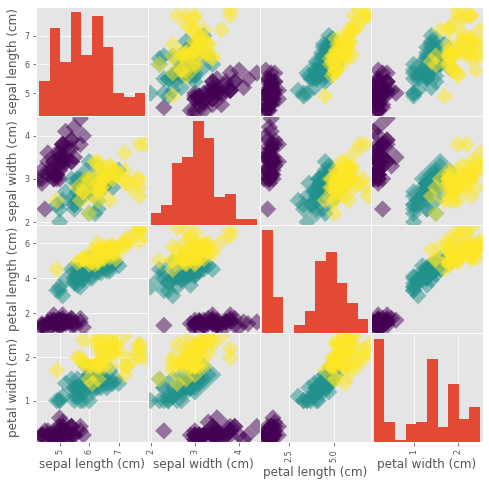

In [8]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8,8], 
                              s = 150, marker = 'D')

##  Classification with k-Nearest Neighbors 
- Basic idea: predict the label of a data point by looking at the 'k' closest labeled data points
- taking a mjority vote

## Scikit-learn fit and predict
- All machine learning models implemented as Python classes
    - They implement the algorithms for learning *and* predicting
    - Stores the information learned from the data
- **Training the model on the data** = *'fitting'* a model to the data
    - scikit-learn uses the `.fit()` method 
    - to predict the labels of the new data use the `.predict()` method

In [9]:
# Using scikit-learn to fit a classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)


In [10]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [11]:
# Predicting on unlabeled data
X_new = np.array([[5.6,2.8,3.9,1.1],
                [5.7,2.6,3.8,1.3],
                [4.7,3.2,1.3,0.2]])
print(X_new.shape)
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))

(3, 4)
Prediction: [1 1 0]


## Measuring model performance
- In classification, **accuracy** is a commonly used metric
- **Accuracy** = fraction of correct predictions
- Which data should be used to compute accuracy?
- How well will the model perform on new data?
- Common best practice to split data into training and testing sets

### Train/test split
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = 
    train_test_split(X, y, test_size=0.3,
                     random_state=21, stratify=y)
```

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, # specifies what portion of the original data will be used for the test set
                     random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:{}".format(y_pred))

Test set predictions:[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [13]:
knn.score(X_test, y_test)

0.9555555555555556

## Model complexity 
- Larger k = smoother decision boundary = less complex model
- Smaller k = more complex model = can lead to overfitting

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

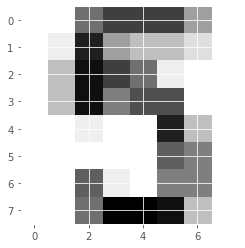

In [14]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits['DESCR'])

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [15]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


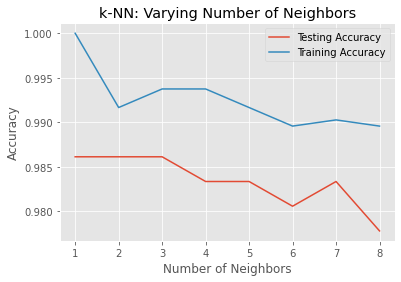

In [16]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Intro to regression
### Regression mechanics
- y = $\alpha$x + $\beta$
    - y = target
    - x = single feature
    - $\alpha$, $\beta$ = model parameters (slope, intercept)
- Define an error (loss/cost) function for any given line (ex. OLS)
    - choose the line that minimizes the error function (residuals)

In [17]:
boston = datasets.load_boston()
print(boston.keys())
print(boston['DESCR'])


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [18]:
type(boston.data), type(boston.target)

(numpy.ndarray, numpy.ndarray)

In [19]:
print('There are ' + str(boston.data.shape[1]) + ' columns and ' + str(boston.data.shape[0]) + ' rows in the Boston dataset')

There are 13 columns and 506 rows in the Boston dataset


In [20]:
data = pd.DataFrame(boston.data, columns= list(boston.feature_names))
target = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.merge(data, target, right_index = True, left_index=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
X = df.drop('MEDV', axis = 1).values
y = df['MEDV'].values
names = df.drop('MEDV', axis = 1).columns

In [22]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [23]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

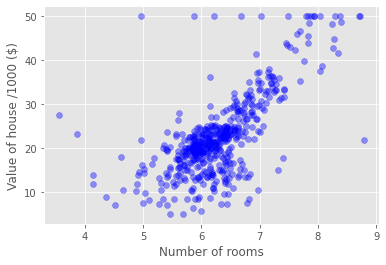

In [24]:
plt.scatter(X_rooms, y, c = 'b', alpha = 0.4)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms),
                              max(X_rooms)).reshape(-1,1)

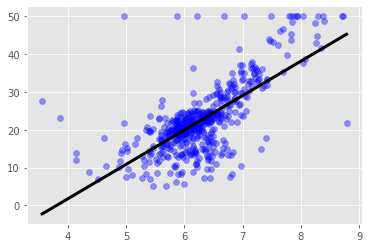

In [26]:
plt.scatter(X_rooms, y, c = 'b', alpha=0.4)
plt.plot(prediction_space, reg.predict(prediction_space),
        c='k', linewidth=3)
plt.show()


## Linear regression on all features

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.711226005748496
Root Mean Squared Error: 4.638689926172797


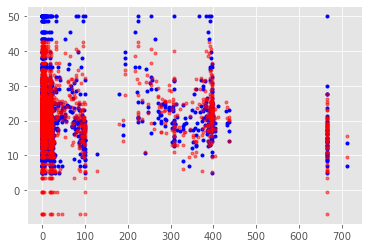

In [28]:
plt.plot(X_test, y_test, color='b', marker='.', linestyle='None')
plt.plot(X_test, y_pred, color='r', marker='.', linestyle='None', alpha =0.5)
plt.show()

## Cross-validation
### Cross-validation motivation
- Model performance is dependent on the way the data is split
- Not representative of the models ability to generalize

### Cross-validation and model performance
- k folds = k-fold CV
- More folds = more computationally expensive

In [29]:
# Cross-validation in scikit-learn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
cv5_results = cross_val_score(reg, X, y, cv = 5)
cv10_results = cross_val_score(reg, X, y, cv = 10)
print(cv5_results)
print(cv10_results)
print("Average 5-Fold CV Score: {}".format(np.mean(cv5_results)))
print("Average 10-Fold CV Score: {}".format(np.mean(cv10_results)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
[ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
Average 5-Fold CV Score: 0.3532759243958772
Average 10-Fold CV Score: 0.2025289900605657


## Regularized Regression 

### Why regularize
- It chooses a coefficient for each feature variable 
- Large coefficients can lead to overfitting
- Penalize large coefficients: Regularization

In [30]:
# Ridge regression in scikit-learn
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127313

### Lasso regression 
- Can be used to select important features of a dataset
- Shrinks the coefficients of less important features to exactly 0

In [31]:
# Lasso regression in scikit-learn
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.5950229535328551

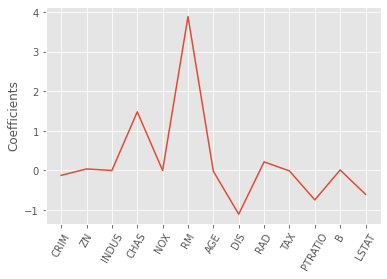

In [32]:
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X_train, y_train).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel("Coefficients")
plt.show()

In [33]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

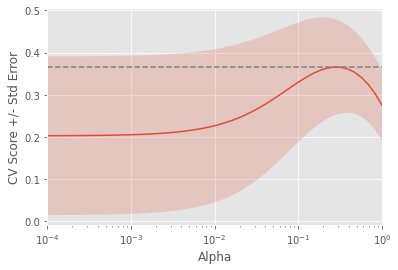

In [34]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

## Classification metrics
- Measuring model performance with accuracy:
    - fraction of correctly classified samples
    - not always a useful metric

## Class imbalance example: Emails
- Spam classification 
    - 99% of emails and real, 1% are spam

## Diagnosing classification predictions
- precision = TP / TP + FP
- Sensitivity (recall) = TP / TP + FN
- F1score: 2 * (precision * recall / precision + recall)
- High precision: Not many emails are predicted as spam
- High sensitivity(recall): predicted most spam emails correctly

In [35]:
# Confusion matrix in scikit-learn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the digits dataset: digits
digits = datasets.load_digits()

# Create feature and target arrays
X = digits.data
y = digits.target

# Create a k-NN classifier with 8 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=8)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, stratify=y)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Print the accuracy
print(knn.score(X_test, y_test))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))


0.9735744089012517
[[71  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  0  0  0  0]
 [ 0  2 68  0  0  0  0  1  0  0]
 [ 0  0  0 73  0  0  0  0  0  0]
 [ 0  0  0  0 71  0  0  1  0  0]
 [ 0  0  0  0  0 72  0  0  0  1]
 [ 0  1  0  0  0  0 71  0  0  0]
 [ 0  0  0  0  0  0  0 72  0  0]
 [ 0  5  0  1  0  0  0  1 63  0]
 [ 0  1  0  0  1  0  0  4  0 66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       0.89      1.00      0.94        73
           2       1.00      0.96      0.98        71
           3       0.99      1.00      0.99        73
           4       0.99      0.99      0.99        72
           5       1.00      0.99      0.99        73
           6       1.00      0.99      0.99        72
           7       0.91      1.00      0.95        72
           8       1.00      0.90      0.95        70
           9       0.99      0.92      0.95        72

    accuracy                           0.97       719


## Logistic regression and the ROC curve
### Logistic regression for binary classification 
- Logistic regression outputs probabilities ($\rho$)
- If the probability $\rho$ is greater than 0.5:
    - the data is labeled '1'
- If the probability $\rho$ is less than 0.5:
    - the data is labeled '0'
- Logistic regression outputs a linear decision boundary

### Probability thresholds
- By default, logistic regression threshold = 0.5

In [36]:
# Load the digits dataset: digits
cancer = datasets.load_breast_cancer()

# Print the keys and DESCR of the dataset
print(cancer.keys())
print(cancer['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

In [37]:
X = cancer.data
y = cancer.target

In [38]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.
0.96

0.96

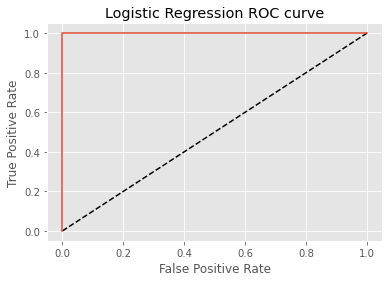

[[15  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

AUC: 1.0
AUC scores computed using 5-fold cross-validation: [1.   1.   1.   0.98 1.  ]


In [39]:
# logistic regression in scikit-learn

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Plotting the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show();

# Compute and print the confusion matrix, classification report and AUC score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob)))

# AUC using cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv = 5,
                           scoring = 'roc_auc')
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_scores))

## Hyperparameter tuning
- Linear regression: Choosing parameters
- Ridge/Lasso regression: Choosing alpha
- k_Nearest Neighbors: Choosing n_neighbors
- Parameters like alpha and k: Hyperparamters

### Choosing the correct hyperparameter
- Try a bunch of different hyperparameter values
- Fit them all seperately
- See how well each performs
- Choose the best performing one
- It is essential to use cross-validation

### Grid search cross-validation


In [40]:
# GridSearchCV in scikit-learn

# Load the digits dataset: digits
digits = datasets.load_digits()

# Create feature and target arrays
X = digits.data
y = digits.target

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

knn_cv.best_params_

{'n_neighbors': 2}

In [41]:
knn_cv.best_score_

0.9671711544413494

## Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

In [42]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1}
Best score is 0.772418755803157


## Hold-out set for final evaluation
### Hold-out set reasoning
- How well does the model perform on data that hasn't been seen?
- Using all of the data for cross-validation is not ideal
- Split all data into training set and hold-out set at the beginning
- Perform cross-validation on the training set 
- Choose the best hyperparameters and evaluate the hold-out set

In [43]:
X = boston.data
y = boston.target


In [44]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Michael Monahan\anac

C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1345, in fit
    check_classification_targets(y)
  File "C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFai

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

## Preprocessing data  
### Dealing with categorical variables
- Scikit-learn will not accept categorical features by default
- Need to encode categorical features numerically
- Convert to 'dummy' variables
- scikit-learn: `OneHotEncoder()`
- pandas: `get_dummies()`

### Encoding dummy variables
```python
import pandas as pd
df = pd.read_csv('auto.csv')
df_origin = pd.get_dummies(df, drop_first = True) #or
df_origin = df_origin.drop('origin_Asia',axis = 1)
print(df_origin.head())
```

### Linear regression with dummy variables
```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
ridge = Ridge(alpha = 0.5, normalize = True).fit(X_train, y_train)
ridge.score(X_test, y_test)
```

## Handling missing data

In [45]:
# Load dataset
diabetes = datasets.load_diabetes()
print(diabetes.keys())
print(diabetes['DESCR'])
print('There are ' + str(diabetes.data.shape[1]) + ' columns and ' + str(diabetes.data.shape[0]) + ' rows in the Diabetes dataset')

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
     

In [46]:
data = pd.DataFrame(diabetes.data, columns= list(diabetes.feature_names))
target = pd.DataFrame(diabetes.target, columns=['PROGESSION'])
df = pd.merge(data, target, right_index = True, left_index=True)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,PROGESSION
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         442 non-null    float64
 1   sex         442 non-null    float64
 2   bmi         442 non-null    float64
 3   bp          442 non-null    float64
 4   s1          442 non-null    float64
 5   s2          442 non-null    float64
 6   s3          442 non-null    float64
 7   s4          442 non-null    float64
 8   s5          442 non-null    float64
 9   s6          442 non-null    float64
 10  PROGESSION  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [48]:
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  PROGESSION  
0 -0.002592  0.019908 -0.017646       151.0  
1 -0.039493 -0.068330 -0.092204        75.0  
2 -0.002592  0.002864 -0.025930       141.0  
3  0.034309  0.022692 -0.009362       206.0  
4 -0.002592 -0.031991 -0.046641       135.0  


In [49]:
# Dropping missing data
df = df.dropna()
df.shape

(442, 11)

## Imputing missing data 
- Involves making an educated guess about the missing data 
- Example: using the mean of non-missing entries
```python
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean',axis=0)
imp.fit(X)
X = imp.transform(X)
```

## Imputing within an pipeline
```python
from sklearan.pipeline import Pipeline
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN',strategy='mean',axis=0)
logreg = LogisticRegression()
steps = [('imputation',imp),('logistic_regression',logreg)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
```


In [56]:
# Example
# Do not run

# Import necessary modules

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps


# Create the pipeline: pipeline
#pipeline = Pipeline(steps)

# Create training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
#pipeline.fit(X_train, y_train)

# Predict the labels of the test set
#y_pred = pipeline.predict(X_test)

# Compute metrics
#print(classification_report(y_test, y_pred))

In [50]:
## Centering and scaling
wine = pd.read_csv('winequality-red.csv', sep = ';')
wine.keys()
wine = pd.DataFrame(wine)
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

## Why scale the data?
- Many models use some form of distance to inform them
- Features on larger scales can unduly influence the model
- Example: k-NN uses distance explicity when making predictions
- We want features to be on a similar scale
- Normalizing = scaling and/or centering

## Ways to normalize the data
- Standardization: subtract the mean and divide by the variance: All features are centered around zero and have a variance of one
- Can also subtract the minimum and divide by the range: minimum 0 and maximum 1
- Can also normalize so the data ranges from -1 to +1

## Scaling in scikit-learn
```python 
from sklearn.preprocessing import scale
X_scaled = scale(X)
```


In [75]:
X = wine.drop('quality', axis = 1).values
y = wine['quality'].values

In [61]:
from sklearn.preprocessing import scale

In [76]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 8.134219224515322
Standard Deviation of Unscaled Features: 16.726533979432848
Mean of Scaled Features: 2.546626531486538e-15
Standard Deviation of Scaled Features: 1.0


## Scaling in a pipeline 
```python 
sklearn.preprocessing import StandardScaler
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)
```

In [85]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.5708333333333333
Accuracy without Scaling: 0.48541666666666666


In [79]:
## CV and scaling in a pipeline
steps =[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors': np.arange(1,50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)
cv = GridSearchCV(pipeline, param_grid = parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
accuracy_score(y_test, y_pred)
print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'knn__n_neighbors': 1}
0.634375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.18      0.12      0.15        16
           5       0.66      0.72      0.69       127
           6       0.68      0.60      0.64       131
           7       0.63      0.69      0.66        42
           8       0.25      0.33      0.29         3

    accuracy                           0.63       320
   macro avg       0.40      0.41      0.40       320
weighted avg       0.63      0.63      0.63       320



In [80]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.65625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.29      0.12      0.17        16
           5       0.67      0.77      0.72       127
           6       0.67      0.66      0.66       131
           7       0.67      0.57      0.62        42
           8       0.00      0.00      0.00         3

    accuracy                           0.66       320
   macro avg       0.38      0.35      0.36       320
weighted avg       0.64      0.66      0.65       320

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


In [88]:
from sklearn.linear_model import ElasticNet

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values='NaN', strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio' :np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Michael Monahan\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Michael Monahan\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
   

ValueError: 'X' and 'missing_values' types are expected to be both numerical. Got X.dtype=float64 and  type(missing_values)=<class 'str'>.